# Algerian forest fire dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data
df = pd.read_csv(r'C:\Users\sahil\Documents\ineuron\dataset\Algerian_forest_fires_dataset_UPDATE.csv', header = 1)

In [3]:
df.shape

(246, 14)

In [4]:
# Removing empty row
df_copy = df.drop(index = 122)

In [5]:
# Removing headers inbetween rows
df_copy.drop(index = 123, inplace = True, axis = 0)

In [6]:
# reset index as there will be gaps in the index
df_copy.reset_index(inplace = True)

In [7]:
# Removing index column
df_copy.drop(columns=['index'], inplace = True, axis = 0)

In [8]:
df_copy

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


#  Data Information

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and â€œnot not fire

In [9]:
df_copy['region'] = 1

In [10]:
df_copy.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [11]:
# Setting value for bajaia region as 1 & Sidi-Bel Abbes Region as 0

for i in range(len(df_copy)):
    if i >= 122:
        df_copy['region'][i] = 0

In [12]:
# Dimension of the data
df_copy.shape

(244, 15)

In [13]:
df_copy.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [14]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


In [15]:
# Changing the data types of the columns
df_copy['Temperature'] = df_copy['Temperature'].astype('int')
df_copy[' RH'] = df_copy[" RH"].astype('int')
df_copy[' Ws'] = df_copy[' Ws'].astype('int')
df_copy['Rain '] = df_copy['Rain '].astype('float')
df_copy['FFMC'] = df_copy['FFMC'].astype('float')
df_copy['DMC'] = df_copy['DMC'].astype('float')


In [16]:
# error in this entry
df_copy.iloc[165,:]

day                 14
month               07
year              2012
Temperature         37
 RH                 37
 Ws                 18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
region               0
Name: 165, dtype: object

In [17]:
# correcting wrong entry in the data
df_copy.at[165,'DC'] = 14.6
df_copy.at[165,'ISI'] = 9
df_copy.at[165,'BUI'] = 12.5
df_copy.at[165,'FWI'] = 10.4
df_copy.at[165,'Classes  '] = 'fire'


In [18]:
# Changing the data type of the features
df_copy['DC'] = df_copy['DC'].astype('float')
df_copy['ISI'] = df_copy['ISI'].astype('float')
df_copy['BUI'] = df_copy['BUI'].astype('float')
df_copy['FWI'] = df_copy['FWI'].astype('float')
df_copy['day'] = df_copy['day'].astype('int')
df_copy['month'] = df_copy['month'].astype('int')
df_copy['year'] = df_copy['year'].astype('int')

In [19]:
df_copy.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [20]:
# removing extra spaces in columns name
df_copy.columns = [col.strip() for col in df_copy.columns]

In [21]:
df_copy.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [22]:
df_copy.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [23]:
# Checking for Zero variance 
df_copy.var()==0

day            False
month          False
year            True
Temperature    False
RH             False
Ws             False
Rain           False
FFMC           False
DMC            False
DC             False
ISI            False
BUI            False
FWI            False
region         False
dtype: bool

In [24]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  region       244 non-null    int64  
dtypes: float64(7), int32(6), int64(1), object(1)
memory usage: 23.0+ KB


In [25]:
# 5 point Summary
df_copy.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [26]:
# Checking for null values
df_copy.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [27]:
# Checking for duplicate values

df_copy.duplicated().sum()

0

There is no duplicate value

In [28]:
## seperating numerical and categorical columns

In [29]:
numeric_col = [col for col in df_copy.columns if df_copy[col].dtype != 'O']
categorical_col = [col for col in df_copy.columns if df_copy[col].dtype =='O']

In [30]:
print(f'There are {len(numeric_col)} and name are {numeric_col}')
print(f'There are {len(categorical_col)} and name are {categorical_col}')

There are 14 and name are ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'region']
There are 1 and name are ['Classes']


## Univariate analysis

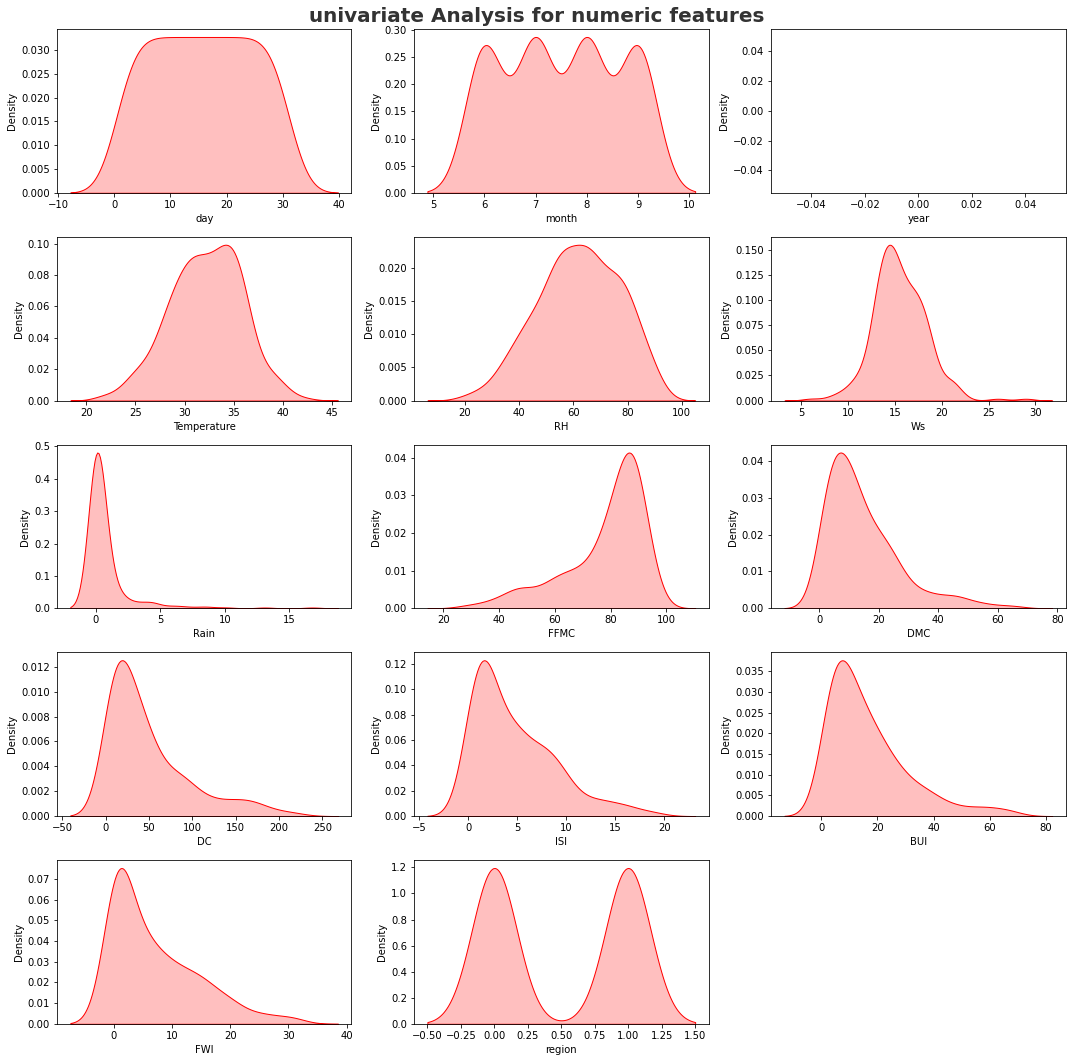

In [31]:
plt.figure(figsize =(15,15))
plt.suptitle('univariate Analysis for numeric features',fontsize = 20, fontweight='bold', alpha=0.8 )

for i in range (0, len(numeric_col)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_copy[numeric_col[i]], shade= True, color='r')
    plt.xlabel(numeric_col[i])
    plt.tight_layout()

Report
- Year has no variance.
- Rain, DM, DC, ISI, BUI and FWI are right skewed
- FFMC is left skewed

In [32]:
# There were space error in the column
df_copy['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [33]:
df_copy['Classes'] = df_copy['Classes'].str.strip()

In [34]:
df_copy['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

<AxesSubplot:xlabel='Classes', ylabel='count'>

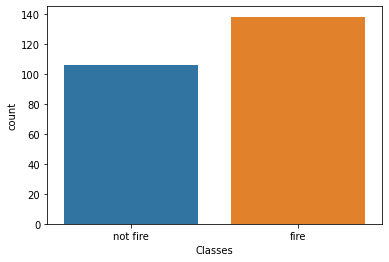

In [35]:
sns.countplot(df_copy['Classes'])

In [36]:
df_copy.groupby(['month','Classes'])['Classes'].count()

month  Classes 
6      fire        25
       not fire    35
7      fire        39
       not fire    23
8      fire        51
       not fire    11
9      fire        23
       not fire    37
Name: Classes, dtype: int64

<AxesSubplot:xlabel='Classes', ylabel='count'>

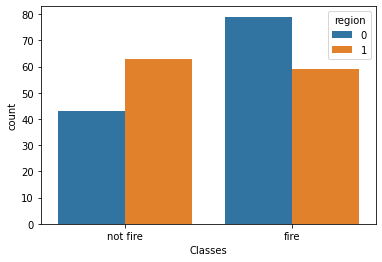

In [37]:
sns.countplot(df_copy['Classes'], hue=df_copy['region'])

In [38]:
Report:
    - Sidi-Bel Abbes has more fire days than bijaia
    

SyntaxError: invalid syntax (3229141517.py, line 1)

In [39]:
## Since Year has zero variance it will not give any information so we can drop it

df_copy.drop(columns=['year'], axis=1, inplace = True)

# Scatter plot

<AxesSubplot:ylabel='Rain'>

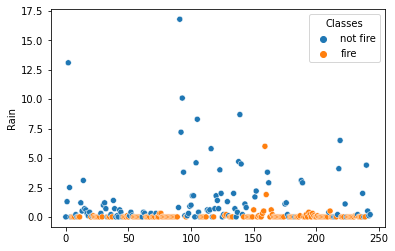

In [40]:
sns.scatterplot(x=df_copy.index, y ='Rain', data= df_copy, hue=df_copy['Classes'])

<AxesSubplot:ylabel='month'>

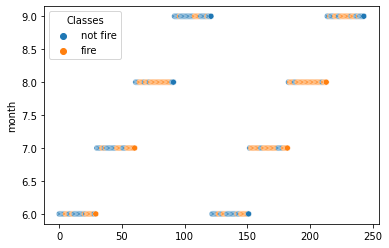

In [41]:
sns.scatterplot(x=df_copy.index, y ='month', data= df_copy, hue=df_copy['Classes'])

<AxesSubplot:ylabel='Temperature'>

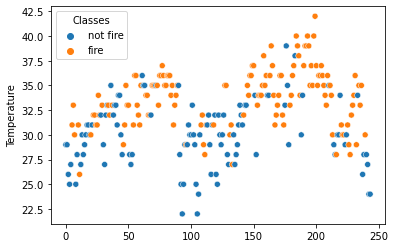

In [42]:
sns.scatterplot(x=df_copy.index, y ='Temperature', data= df_copy, hue=df_copy['Classes'])

<AxesSubplot:ylabel='RH'>

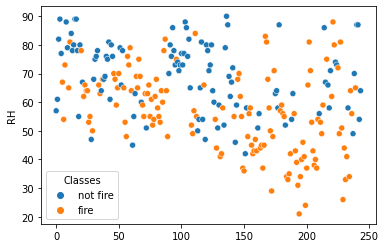

In [43]:
sns.scatterplot(x=df_copy.index, y ='RH', data= df_copy, hue=df_copy['Classes'])

<AxesSubplot:ylabel='Ws'>

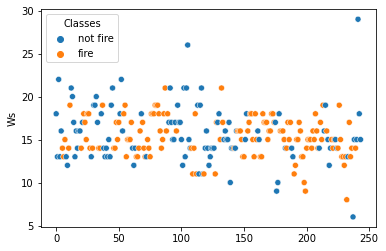

In [44]:
sns.scatterplot(x=df_copy.index, y ='Ws', data= df_copy, hue=df_copy['Classes'])

<AxesSubplot:ylabel='FFMC'>

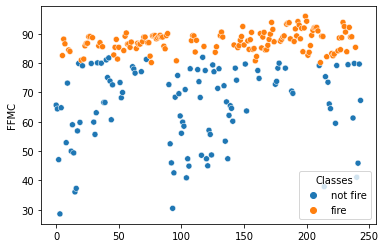

In [45]:
sns.scatterplot(x=df_copy.index, y ='FFMC', data= df_copy, hue=df_copy['Classes'])

<AxesSubplot:ylabel='DMC'>

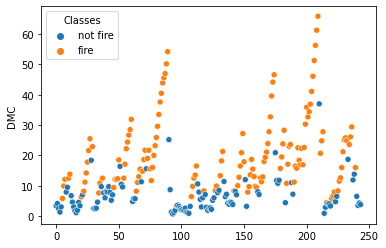

In [46]:
sns.scatterplot(x=df_copy.index, y ='DMC', data= df_copy, hue=df_copy['Classes'])

In [47]:
Report :- 
    DMC above 10 has highest chance of fire
    

SyntaxError: invalid syntax (691801923.py, line 1)

<AxesSubplot:ylabel='DC'>

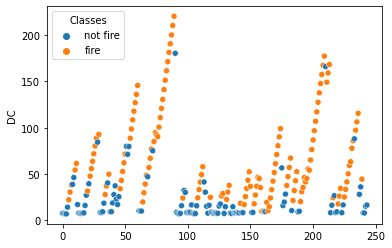

In [48]:
sns.scatterplot(x=df_copy.index, y ='DC', data= df_copy, hue=df_copy['Classes'])

In [49]:
- Report:
    Higher draught higher the chance of fire

SyntaxError: invalid syntax (2522260638.py, line 1)

<AxesSubplot:ylabel='ISI'>

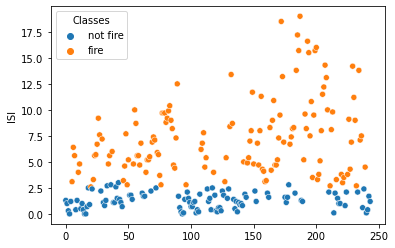

In [50]:
sns.scatterplot(x=df_copy.index, y ='ISI', data= df_copy, hue=df_copy['Classes'])

In [51]:
Report :
    Speed index greater than 2.5 indicates the fire.

SyntaxError: invalid syntax (2715936670.py, line 1)

<AxesSubplot:ylabel='BUI'>

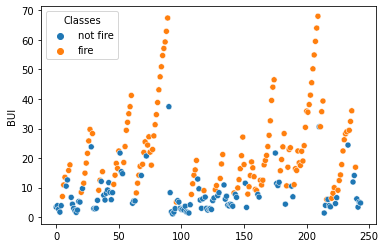

In [52]:
sns.scatterplot(x=df_copy.index, y ='BUI', data= df_copy, hue=df_copy['Classes'])

<AxesSubplot:ylabel='FWI'>

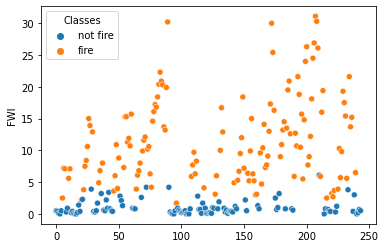

In [53]:
sns.scatterplot(x=df_copy.index, y ='FWI', data= df_copy, hue=df_copy['Classes'])

KeyError: 'year'

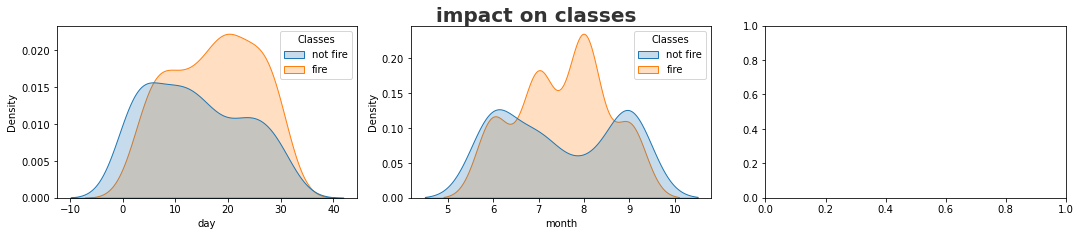

In [54]:
plt.figure(figsize =(15,15))
plt.suptitle('impact on classes',fontsize = 20, fontweight='bold', alpha=0.8 )

for i in range (0, len(numeric_col)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_copy[numeric_col[i]], hue= df_copy['Classes'], shade= True, color='r')
    plt.xlabel(numeric_col[i])
    plt.tight_layout()

Inference 

- maximum fire occurs in the month of july and aug.
- Temperature highly impacts the fire 
- Maximum fire occures at humidity between 40-60
- Rain inversely impacts the fire
- Increase in DMC, DC, ISI, BUI, FWI increase chances of fire.

In [ ]:
plt.figure(figsize =(15,15))
plt.suptitle('impact on classes',fontsize = 20, fontweight='bold', alpha=0.8 )

for i in range (0, len(numeric_col)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x=df_copy[numeric_col[i]], hue= df_copy['Classes'])
    plt.xlabel(numeric_col[i])
    plt.tight_layout()

In [ ]:
plt.figure(figsize =(15,15))
plt.suptitle('impact on region',fontsize = 20, fontweight='bold', alpha=0.8 )

for i in range (0, len(numeric_col)):
    plt.subplot(5,3,i+1)
    sns.stripplot(x='region',y=numeric_col[i],data=df_copy)
    plt.xlabel(numeric_col[i])
    plt.tight_layout()

# Rain vs Month

<AxesSubplot:xlabel='month', ylabel='Rain'>

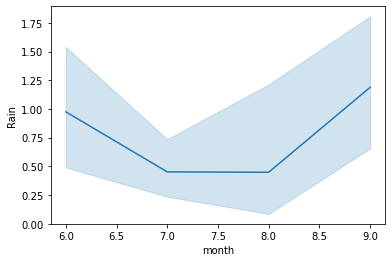

In [55]:
sns.lineplot(x = 'month', y = 'Rain', data = df_copy )

Inference - 

Rain is less in july and aug

In [56]:
Temperature Vs WindSpeed

SyntaxError: invalid syntax (2761888180.py, line 1)

<AxesSubplot:xlabel='Temperature', ylabel='Ws'>

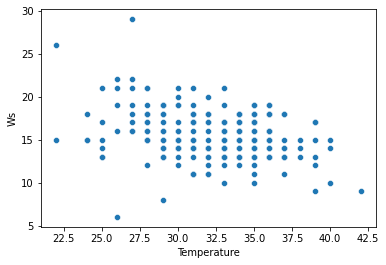

In [57]:
sns.scatterplot(x = 'Temperature', y = 'Ws', data = df_copy)

<AxesSubplot:xlabel='Temperature', ylabel='Ws'>

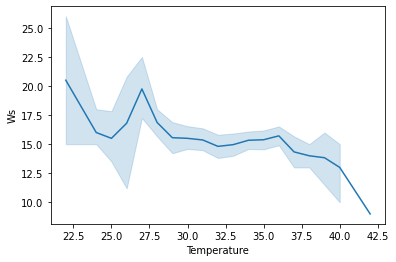

In [58]:
sns.lineplot(x = 'Temperature', y = 'Ws', data = df_copy)

# Multivariate Analysis

In [59]:
df_copy.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.179301,0.517224,0.350234,-4.662229e-16
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.063545,0.085567,0.081732,6.718556e-17
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839,-2.734961e-01
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457,4.064239e-01
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957,1.768290e-01
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755,4.108006e-02
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430,-2.246798e-01
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191,-1.910937e-01
DC,5.279285e-01,1.276719e-01,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041,8.148947e-02
ISI,1.793008e-01,6.354476e-02,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422,-2.662977e-01


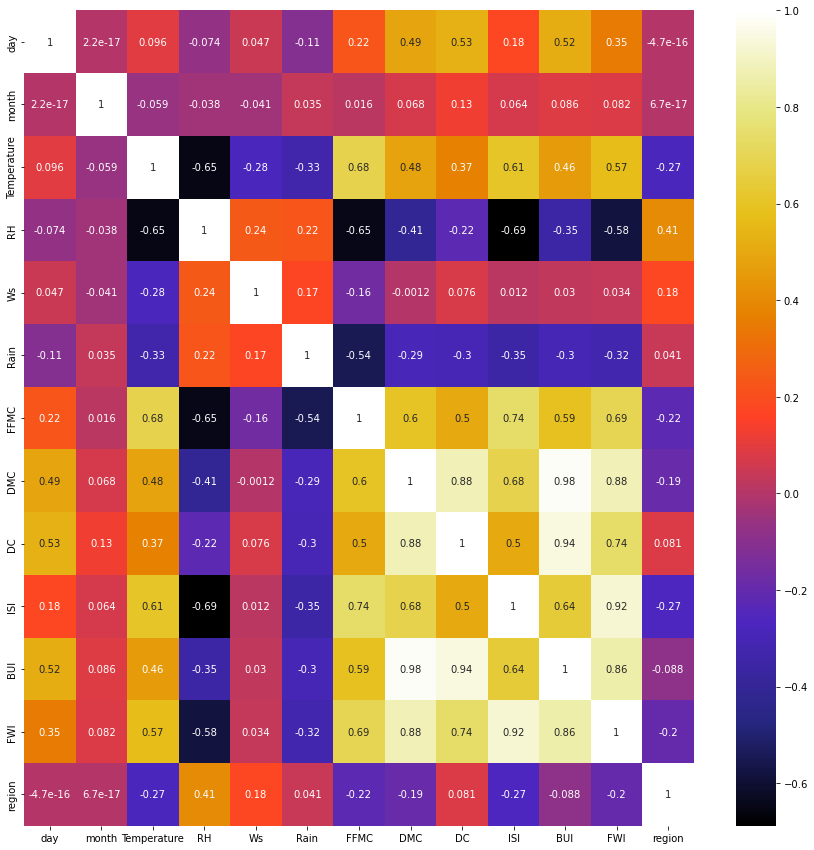

In [60]:
plt.figure(figsize=(15,15))
sns.heatmap(df_copy.corr(), cmap='CMRmap', annot=True)
plt.show()

Inference :- 
    DMC & DC are highly correlated with BUI

# Pairplot

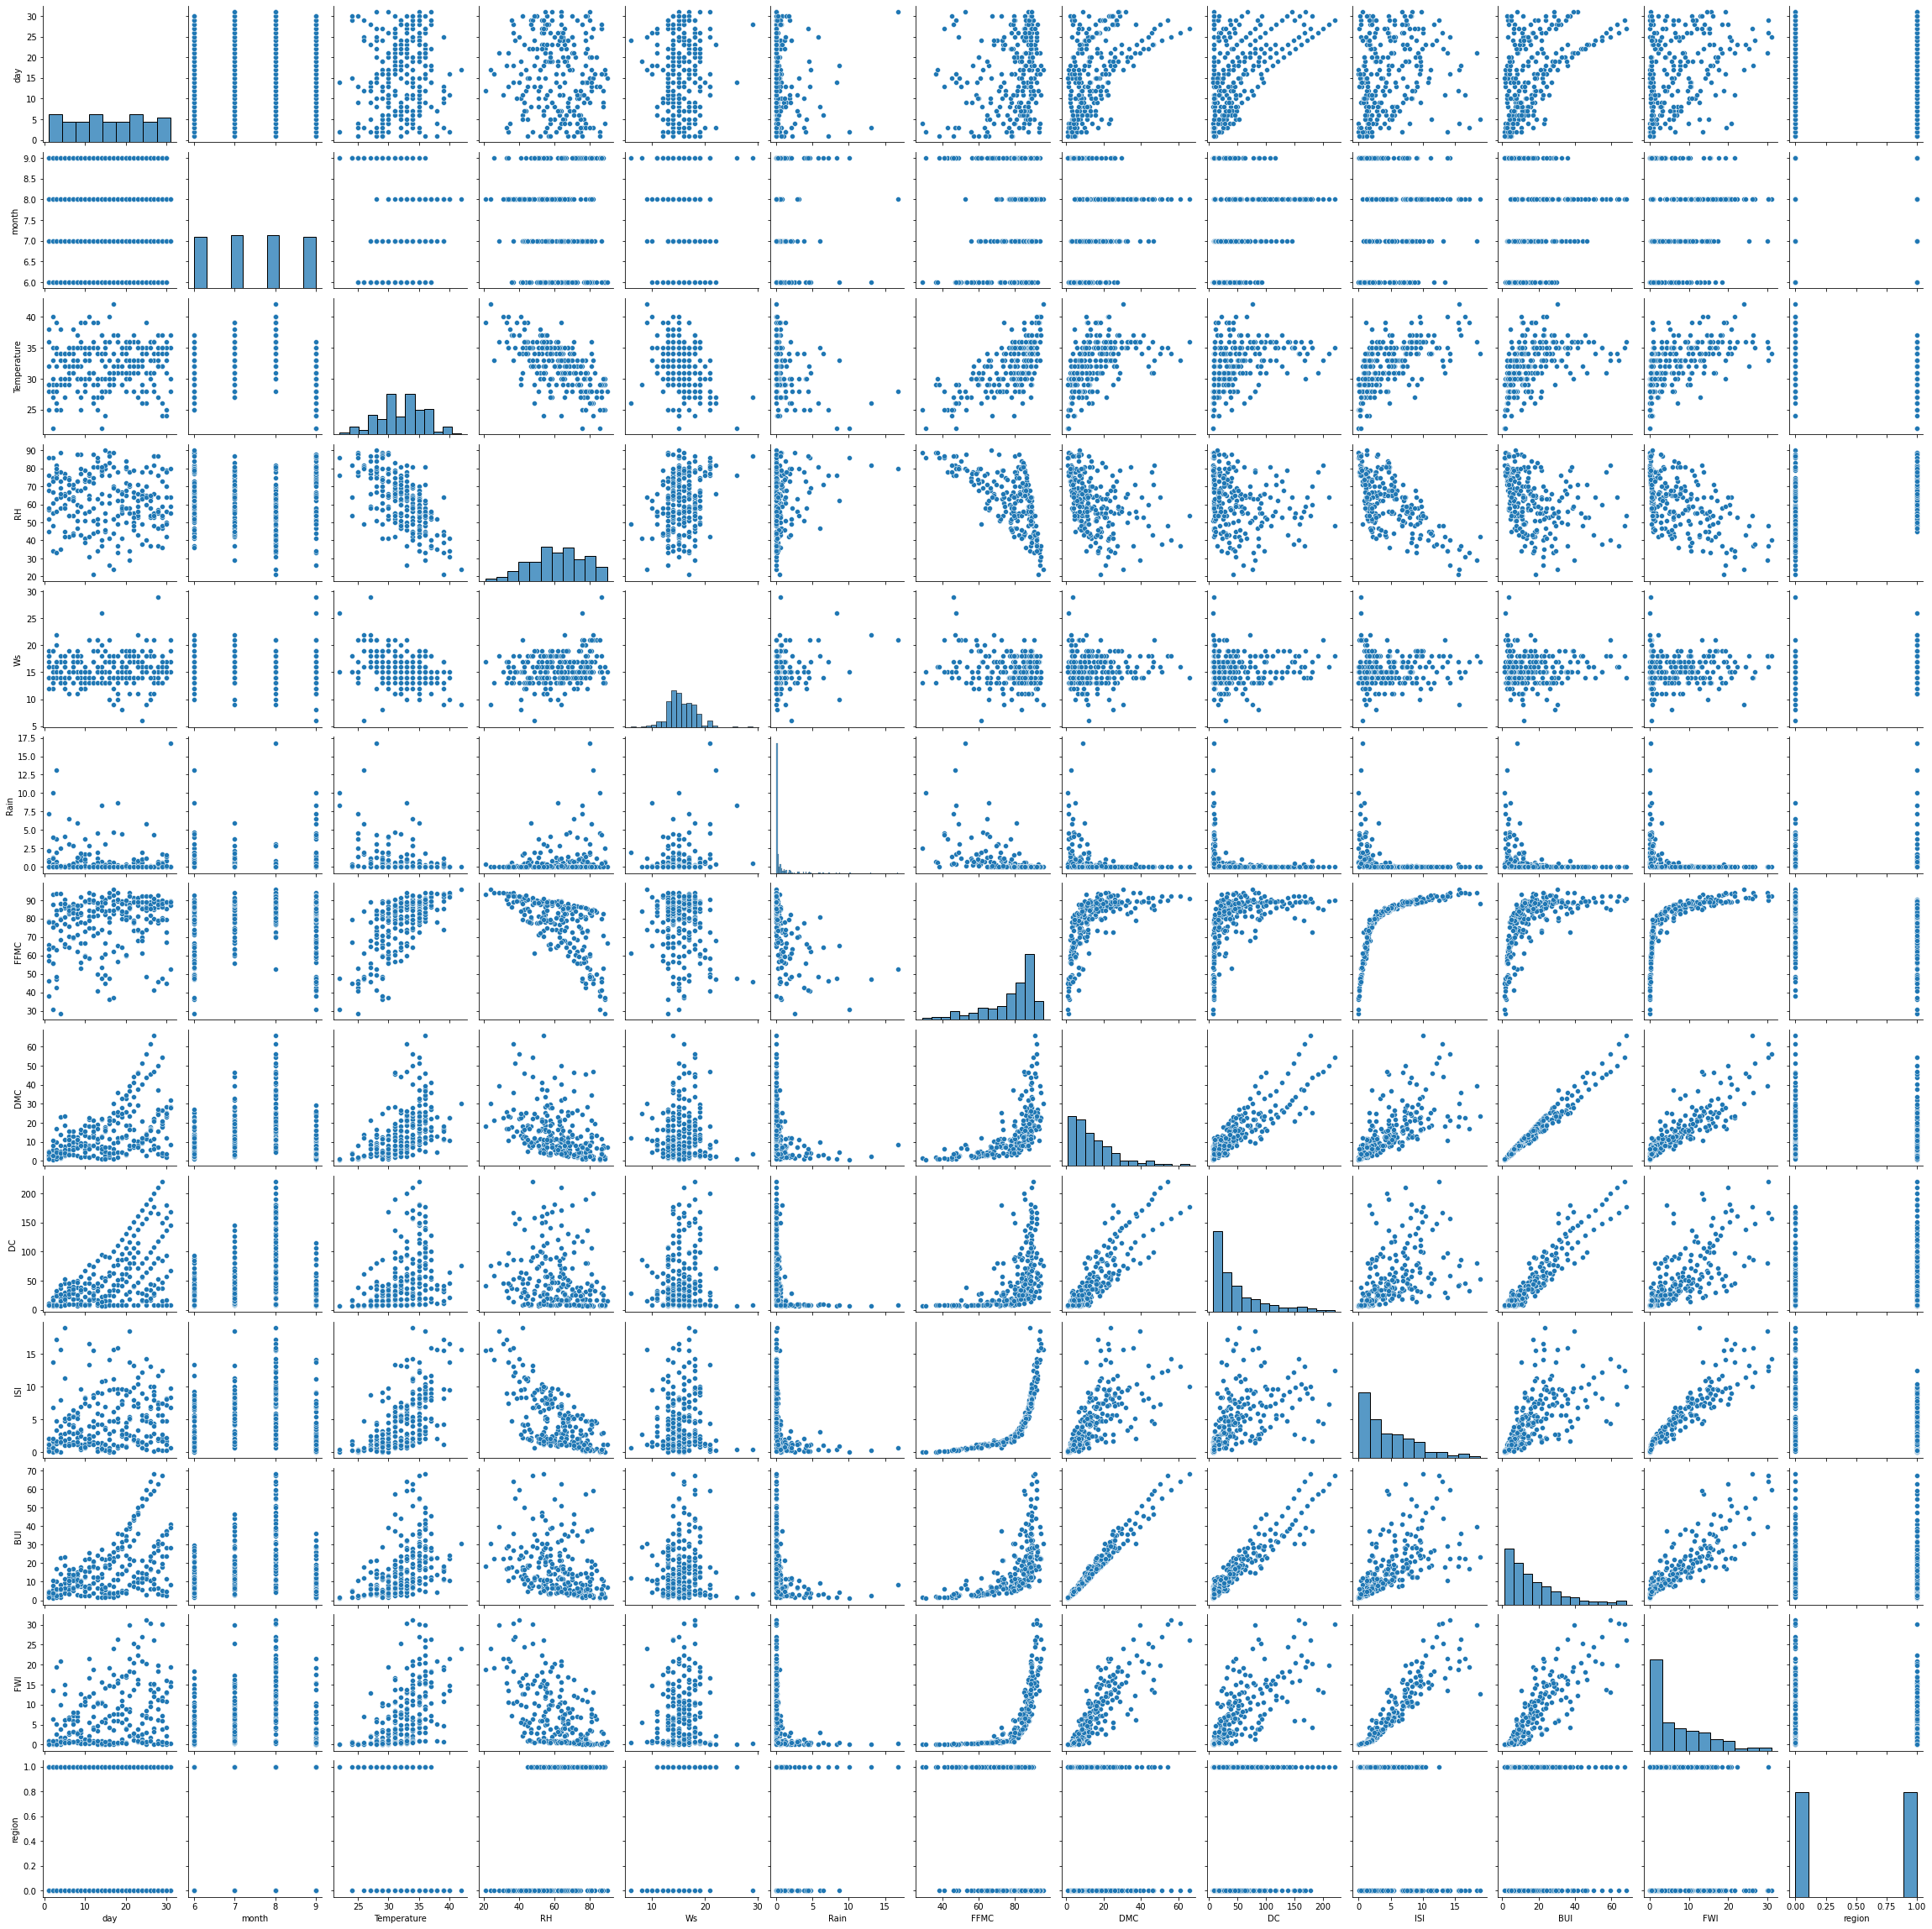

In [61]:
sns.pairplot(data = df_copy)

# EDA Final Report

- DMC & DC are highly correlated with BUI
- Relative Humidity is higher in region 1
- average wind speed is higher in region 1
- windspeed is decreasing with increase in temperature
- maximum fire occurs in the month of july and aug.
- Temperature highly impacts the fire 
- Maximum fire occures at humidity between 40-60
- Rain inversely impacts the fire
- Increase in DMC, DC, ISI, BUI, FWI increase chances of fire.

In [62]:
# Dropping BUI 

df_copy.drop(columns = ['BUI'], axis = 1, inplace = True)

In [63]:
df_copy

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Classes,region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,0.5,not fire,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,0.4,not fire,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,0.1,not fire,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,0.0,not fire,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,6.5,fire,0
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,0.0,not fire,0
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,0.2,not fire,0
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,0.7,not fire,0


In [65]:
# Dropping FWI as it is highly correlated

df_copy.drop(columns =['FWI'], axis =1 , inplace = True)

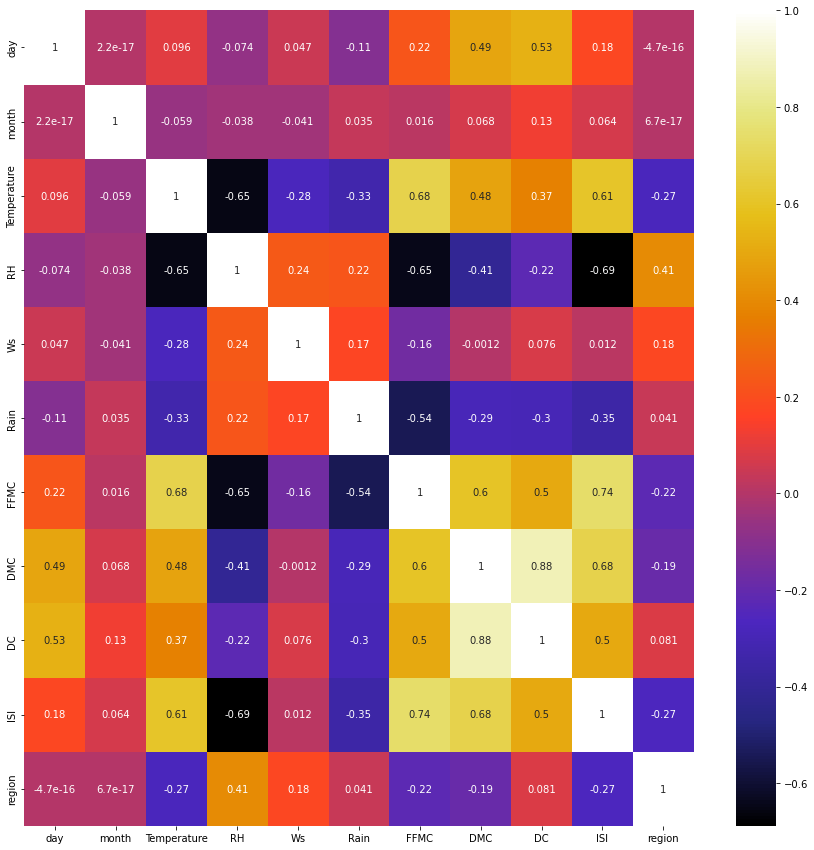

In [66]:
plt.figure(figsize=(15,15))
sns.heatmap(df_copy.corr(), cmap='CMRmap', annot=True)
plt.show()

In [82]:
df_copy = pd.get_dummies(data = df_copy, drop_first= True)

In [83]:
# Applying linear regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [84]:
X = df_copy.drop(columns =['Temperature'], axis = 1)
Y = df_copy.Temperature

In [85]:
Y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 244, dtype: int32

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.25, random_state= 20)

In [87]:
# Feature scaling

from sklearn.preprocessing import StandardScaler

In [88]:
scaler = StandardScaler()

In [89]:
x_train = scaler.fit_transform(x_train)

In [90]:
x_test = scaler.transform(x_test)

## Model Training

## linear Regression

In [91]:
regression = LinearRegression()

In [92]:
regression.fit(x_train, y_train)

LinearRegression()

In [93]:
regression.intercept_

32.32786885245902

In [94]:
regression.coef_

array([-0.38974817, -0.33948177, -1.54292136, -0.89889686, -0.07117482,
        0.88924316, -0.096766  ,  0.780412  ,  0.12971894, -0.0662634 ,
       -0.06456597])

In [95]:
# prediction using Linear regression
reg_pred = regression.predict(x_test)

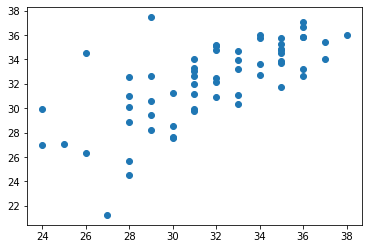

In [96]:
plt.scatter(y_test, reg_pred)

In [97]:
# residuals

reg_residuals = y_test - reg_pred

In [98]:
reg_residuals

87     2.620530
236    0.434567
209    0.139771
153   -1.688921
128    0.158605
         ...   
90     3.275776
178    0.821527
62     1.115753
232   -8.456311
47    -1.606473
Name: Temperature, Length: 61, dtype: float64

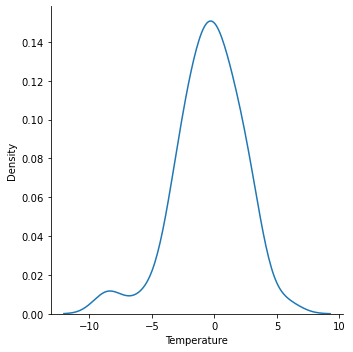

In [100]:
sns.displot(reg_residuals, kind = 'kde')

In [103]:
# Importing metrics to check performance

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [104]:
print(mean_squared_error(y_test, reg_pred))
print(mean_absolute_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

7.154327822715537
2.0055387324796654
2.6747575259667067


In [105]:
# Checking R-squared

from sklearn.metrics import r2_score

In [106]:
lin_score = r2_score(y_test, reg_pred)

In [107]:
lin_score

0.38419491491268765

In [118]:
# adjusted R-squared

lin_adj_r2= 1- (1-lin_score)*(len(y_test)-1)/(len(y_test) - x_test.shape[1]-1)

In [119]:
lin_adj_r2

0.2459529570359441

## Ridge Regression

In [109]:
ridge = Ridge()

In [110]:
ridge.fit(x_train, y_train)

Ridge()

In [111]:
#coefficient

ridge.coef_

array([-0.38177517, -0.33294065, -1.52644109, -0.89373822, -0.07540089,
        0.88116205, -0.06475466,  0.741649  ,  0.1375167 , -0.06277546,
       -0.06997124])

In [112]:
# Intercept

ridge.intercept_

32.32786885245902

In [113]:
ridge_pred = ridge.predict(x_test)

In [114]:
ridge_pred

array([30.39149441, 34.55744917, 35.89825687, 34.66860986, 34.8114166 ,
       36.70990387, 34.51384722, 32.52244494, 34.01880738, 27.57868569,
       29.908423  , 30.58256272, 33.2483696 , 34.7474572 , 35.21413781,
       35.86040428, 35.01303216, 32.01895048, 33.22419766, 32.76935011,
       31.25339286, 32.67424725, 28.87849906, 35.17298394, 34.72265943,
       35.98341789, 33.65007687, 35.72923363, 33.88852358, 35.39372451,
       29.78644754, 21.32966228, 30.86673824, 27.05783554, 25.70703711,
       28.53450212, 27.09908836, 31.07796447, 32.45651708, 33.0379094 ,
       31.17702733, 32.58519517, 35.69498944, 33.30407918, 29.4181395 ,
       30.99691047, 33.96949381, 29.9890405 , 32.13964486, 24.58690062,
       27.62437361, 36.00499638, 30.04308097, 37.05663469, 33.72975135,
       26.38197372, 31.66418763, 28.21702904, 33.8617662 , 37.42262964,
       32.61371186])

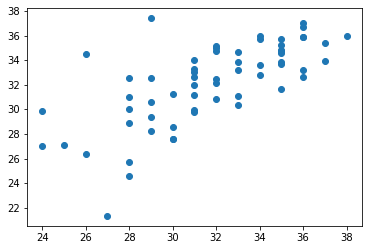

In [115]:
plt.scatter(y_test, ridge_pred)

In [116]:
# residuals from ridge models

ridge_residuals = y_test - ridge_pred 

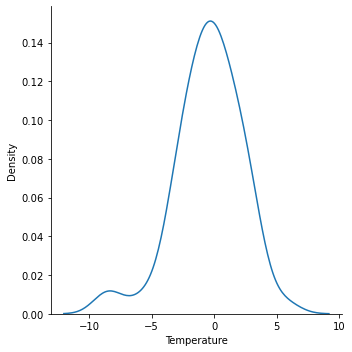

In [117]:
sns.displot(ridge_residuals, kind ='kde')

In [121]:
print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

2.0055387324796654
7.154327822715537
2.6747575259667067


In [122]:
# R- Squared from Ridge Regression

ridge_score = r2_score(y_test, reg_pred)

In [123]:
ridge_score

0.38419491491268765

In [124]:
# Adjusted R-squared

adj_ridge_score = 1- (1-ridge_score)*(len(y_test)-1)/(len(y_test) - x_test.shape[1]-1)

In [125]:
adj_ridge_score

0.2459529570359441

## Lasso Regression


In [126]:
lasso = Lasso()

In [127]:
lasso.fit(x_train, y_train)

Lasso()

In [128]:
# coeff
lasso.coef_

array([ 0.        , -0.        , -0.99867244, -0.        , -0.        ,
        0.76309619,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ])

In [129]:
# intercept
lasso.intercept_

32.32786885245902

In [130]:
lasso_pred = lasso.predict(x_test)

In [131]:
lasso_pred

array([31.33337146, 33.31403981, 33.55520256, 33.78317457, 33.94921311,
       35.40474663, 32.32891652, 32.72559914, 34.34851934, 30.23953362,
       31.62720026, 31.59231021, 33.30876836, 33.63755987, 33.72386471,
       34.18642833, 33.44513986, 31.56332935, 32.47195606, 33.06299612,
       31.39925247, 32.84358113, 31.13965176, 33.81019378, 33.24747262,
       33.9854513 , 33.77393137, 33.91496081, 33.42866355, 33.5439977 ,
       31.27337542, 28.93817182, 31.28127048, 29.22479174, 28.68514226,
       30.15452847, 29.50153072, 31.98499685, 33.31862507, 32.23013135,
       32.04563063, 31.67792887, 33.79965088, 33.08077212, 31.07438426,
       31.84462937, 33.60132168, 31.24441878, 31.88751137, 29.76115565,
       30.19341449, 34.56332485, 30.81939304, 34.95932128, 32.61426097,
       29.49231174, 31.50465723, 30.73573604, 32.80204727, 34.06319912,
       32.30986505])

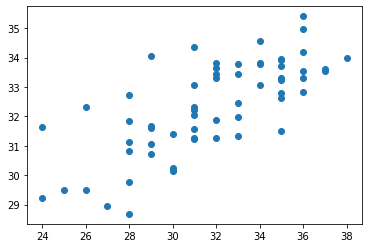

In [132]:
plt.scatter(y_test, lasso_pred)

In [133]:
# Residuals 

lasso_residuals = y_test - lasso_pred

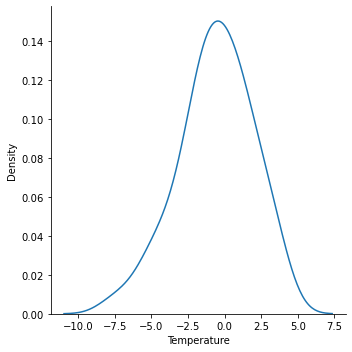

In [134]:
sns.displot(lasso_residuals, kind ='kde')

In [135]:
print(mean_absolute_error(y_test, lasso_pred))
print(mean_squared_error(y_test, lasso_pred))
print(np.sqrt(mean_squared_error(y_test, lasso_pred)))

2.0204341814642763
6.656397807859863
2.579999575166605


In [136]:
# R-Squared for lasso

lasso_score = r2_score(y_test, lasso_pred)

In [137]:
lasso_score

0.42705398466235145

In [138]:
# Adjusted R-Squared

adj_lasso_score = 1 - (1- lasso_score)*(len(y_test) - 1)/(len(y_test) - x_test.shape[1]-1)

In [139]:
adj_lasso_score

0.298433450606961

## ElasticNet Regression

In [140]:
elastic = ElasticNet()

In [141]:
elastic.fit(x_train, y_train)

ElasticNet()

In [142]:
# coeff 
elastic.coef_

array([ 0.        , -0.        , -0.78240031, -0.35331113, -0.        ,
        0.61161627,  0.14068792,  0.        ,  0.329887  , -0.        ,
       -0.13428777])

In [143]:
# intercept

elastic.intercept_

32.32786885245902

In [144]:
elastic_pred = elastic.predict(x_test)

In [145]:
elastic_pred

array([31.27640857, 33.81324658, 34.6382393 , 33.59517652, 33.50198778,
       35.89790837, 33.07683302, 31.92523737, 34.00368242, 29.48240853,
       31.26176144, 31.50474848, 33.52536505, 33.99416307, 33.8015226 ,
       34.49441433, 33.22295193, 32.07232846, 32.67722686, 33.21772791,
       31.64412113, 32.97817517, 31.13618322, 34.31909664, 33.05932221,
       34.0077133 , 33.13222314, 34.4321343 , 32.92570417, 34.17353568,
       30.73176876, 27.16935692, 31.11534972, 29.24510479, 28.87809845,
       30.0377531 , 29.60965972, 31.5126632 , 32.81889072, 32.32977508,
       31.46198838, 31.55796166, 34.050041  , 33.08542665, 30.55128387,
       31.01453775, 33.50757915, 31.44108258, 32.31600713, 28.98366726,
       29.5985818 , 35.10828795, 30.58112455, 35.31374501, 32.83915222,
       29.35327321, 31.19571247, 30.38995349, 32.66250488, 34.7789399 ,
       32.58811136])

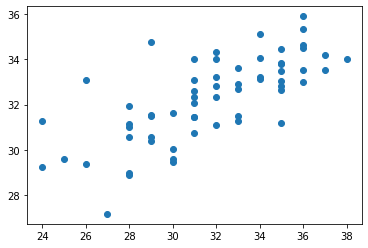

In [146]:
plt.scatter(y_test, elastic_pred)

In [147]:
# ElasticNet residuals

elastic_residuals = y_test - elastic_pred

In [148]:
elastic_residuals

87     1.723591
236    1.186753
209    1.361761
153   -0.595177
128    1.498012
         ...   
90     3.804288
178   -1.389953
62     2.337495
232   -5.778940
47    -1.588111
Name: Temperature, Length: 61, dtype: float64

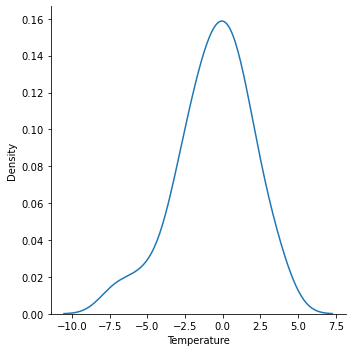

In [149]:
sns.displot(elastic_residuals, kind = 'kde')

In [150]:
print(mean_absolute_error(y_test, elastic_pred))
print(mean_squared_error(y_test, elastic_pred))
print(np.sqrt(mean_squared_error(y_test, elastic_pred)))

1.9277752156268764
6.376513929144947
2.5251760194380406


In [151]:
# R-Squared

elastic_score = r2_score(y_test, elastic_pred)

In [152]:
elastic_score

0.45114484546961964

In [153]:
# Adjusted R- Squared

adj_elastic_score =  1 - (1- elastic_score)*(len(y_test) - 1)/(len(y_test) - x_test.shape[1]-1)

In [154]:
adj_elastic_score

0.3279324638403507

In [155]:
results = {'model':['linear regression', 'Ridge regression', 'Lasso regression', 'ElasticNet regression'], 'R-Squared' : [lin_score, ridge_score, lasso_score, elastic_score], 'Adjusted R-Squared': [lin_adj_r2, adj_ridge_score, adj_lasso_score, adj_elastic_score]}

In [156]:
result = pd.DataFrame(results)

In [157]:
# Final Results of all the models
result

,model,R-Squared,Adjusted R-Squared
0,linear regression,0.384195,0.245953
1,Ridge regression,0.384195,0.245953
2,Lasso regression,0.427054,0.298433
3,ElasticNet regression,0.451145,0.327932
